In [1]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# program_df = pd.read_csv("/Users/krishna/Dropbox/Data/Data/Program/correct File/csvwithHeaders/part-00000-024e4c6e-680c-49e1-8e20-667765b52332-c000.csv")
program = pq.read_table("./part-r-00000-7e9710a6-cd76-4df1-9a5d-626651cb1f87.gz.parquet")
program_df = program.to_pandas()
program_df.replace("NULL", np.nan,inplace=True)
program_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55751 entries, 0 to 55750
Data columns (total 44 columns):
PROGRAM_ID                55751 non-null object
SUBCATEGORY_ID            50736 non-null object
PROGRAM_SOURCE_ID         55751 non-null object
PROGRAM_AIRING_TYPE_ID    761 non-null object
CATEGORY_ID               55751 non-null object
CAPTION_ID                32147 non-null object
PROGRAM_COLOR_TYPE_ID     46282 non-null object
MASTER_TITLE              55751 non-null object
RELEASE_YEAR              36198 non-null object
EPISODE_TITLE             32507 non-null object
EPISODE_NUMBER            30886 non-null object
STEREO_ENABLED_YN         55751 non-null object
STAR_RATING               174 non-null object
SERIES_YN                 55751 non-null object
RATING_ID_TV_US           55751 non-null object
RATING_ID_MOVIE_US        3715 non-null object
SERIES_MASTER_YN          55751 non-null object
PARENT_PROGRAM_ID         37245 non-null object
RUNTIME                   55751 

In [3]:
channel = pq.read_table("./part-r-00000-3f39db89-d190-4785-b70b-de40d5b54de2.gz.parquet")
channel_df = channel.to_pandas()
channel_df.replace("NULL", np.nan,inplace=True)
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 18 columns):
PROGRAM_ID                 503 non-null object
PARENT_PROGRAM_ID          309 non-null object
MASTER_TITLE               503 non-null object
CATEGORY_ID                503 non-null object
SUBCATEGORY_ID             480 non-null object
RELEASE_YEAR               140 non-null object
SERIES_MASTER_YN           503 non-null object
RUNTIME                    503 non-null object
EVENT_DATE                 503 non-null object
EPISODE_NUMBER             260 non-null object
EPISODE_TITLE              303 non-null object
PROGRAM_STARTTIME          503 non-null datetime64[ns]
PROGRAM_ENDTIME            503 non-null datetime64[ns]
NO_OF_SURF_VIEWERS         503 non-null int64
NO_OF_FULL_SHOW_VIEWERS    503 non-null int64
NO_WATCHERS                503 non-null int64
AVG_SURF_TIME              503 non-null float64
AVG_DURATION_HRS           503 non-null float64
dtypes: datetime64[ns](2), float64

In [12]:
channel_df.sort_values('NO_OF_FULL_SHOW_VIEWERS',ascending=False).head()

,PROGRAM_ID,PARENT_PROGRAM_ID,MASTER_TITLE,CATEGORY_ID,SUBCATEGORY_ID,RELEASE_YEAR,SERIES_MASTER_YN,RUNTIME,EVENT_DATE,EPISODE_NUMBER,EPISODE_TITLE,PROGRAM_STARTTIME,PROGRAM_ENDTIME,NO_OF_SURF_VIEWERS,NO_OF_FULL_SHOW_VIEWERS,NO_WATCHERS,AVG_SURF_TIME,AVG_DURATION_HRS
185,14902675,NaN,Cavuto Live,4,75,NaN,Y,7200,2018-01-20 10:00:00.000,NaN,NaN,2018-01-20 04:30:00,2018-01-20 06:30:00,8488,1960,5867,80.056003,0.715662
485,4277644,11206961,The Last Alaskans,5,44,NaN,N,3600,2018-12-23 22:01:00.000,405,The Hunter is Hunted,2018-12-23 16:31:00,2018-12-23 17:31:00,4484,807,2412,113.960480,0.444141
4,2246760,NaN,CNN Newsroom with Poppy Harlow and Jim Sciutto,4,75,NaN,Y,3600,2018-09-17 09:00:00.000,NaN,NaN,2018-09-17 03:30:00,2018-09-17 04:30:00,2152,740,1735,51.983516,0.799032
499,3067567,NaN,CNN Right Now With Brianna Keilar,4,75,NaN,Y,3600,2018-11-12 13:00:00.000,NaN,NaN,2018-11-12 07:30:00,2018-11-12 08:30:00,2177,708,1737,58.629747,0.729068
410,3570454,NaN,Polo,2,53,2018,N,3600,2018-04-29 14:00:00.000,NaN,NaN,2018-04-29 08:30:00,2018-04-29 09:30:00,1863,476,1689,246.640483,0.565164


In [17]:
channel_df.set_index('PROGRAM_ID',inplace=True)
program_df.set_index('PROGRAM_ID',inplace=True)

In [24]:
program_df.head()

,SUBCATEGORY_ID,PROGRAM_SOURCE_ID,PROGRAM_AIRING_TYPE_ID,CATEGORY_ID,CAPTION_ID,PROGRAM_COLOR_TYPE_ID,MASTER_TITLE,RELEASE_YEAR,EPISODE_TITLE,EPISODE_NUMBER,...,month,vwp_days,weekend,daypart,weekOfTheYear,EVENT_END_DATE,airStartDate,airStartTime,airEndDate,airEndTime
PROGRAM_ID,,,,,,,,,,,,,,,,,,,,,
259,53,29227,NaN,2,1,1,High-School Softball,NaN,NaN,NaN,...,4,NONE,0,PRIME,16,2019-04-15 22:00:00.000,2019-04-15,22:00,2019-04-15,22:00
15836,15,20314,NaN,5,NaN,NaN,Moments in Chinese History: Lian Song Fan Hua 34,NaN,NaN,NaN,...,4,NONE,0,PRIME,15,2019-04-12 20:00:00.000,2019-04-12,19:30,2019-04-12,20:00
16349,84,25850,NaN,9,NaN,1,The Amazing Keystone Orchestra joue Quincy Jon...,2014,NaN,NaN,...,6,NONE,1,MORNING,22,2018-06-02 10:35:00.000,2018-06-02,10:10,2018-06-02,10:35
26997,74,3922,NaN,8,1,1,5règles,2018,Soigner ton swag,111,...,9,LABOUR DAY,0,FRINGE,36,2018-09-03 18:30:00.000,2018-09-03,18:00,2018-09-03,18:30
34129,6,20544,NaN,2,1,1,Béisbol: MLB,NaN,Equipos por confirmar,NaN,...,5,NONE,1,PRIME,18,2018-05-05 22:00:00.000,2018-05-05,19:00,2018-05-05,22:00


In [44]:
all_join_data = channel_df.join(program_df,how = 'inner',lsuffix='_channel', rsuffix='_prog').reset_index()
# caller.join(other, lsuffix='_caller', rsuffix='_other')

In [56]:
all_join_data.PROGRAM_ID = all_join_data.PROGRAM_ID.astype('int')
all_join_data.hour = all_join_data.hour.astype('int')

In [57]:
all_join_data.columns

Index(['PROGRAM_ID', 'PARENT_PROGRAM_ID_channel', 'MASTER_TITLE_channel',
       'CATEGORY_ID_channel', 'SUBCATEGORY_ID_channel', 'RELEASE_YEAR_channel',
       'SERIES_MASTER_YN_channel', 'RUNTIME_channel', 'EVENT_DATE_channel',
       'EPISODE_NUMBER_channel', 'EPISODE_TITLE_channel', 'PROGRAM_STARTTIME',
       'PROGRAM_ENDTIME', 'NO_OF_SURF_VIEWERS', 'NO_OF_FULL_SHOW_VIEWERS',
       'NO_WATCHERS', 'AVG_SURF_TIME', 'AVG_DURATION_HRS',
       'SUBCATEGORY_ID_prog', 'PROGRAM_SOURCE_ID', 'PROGRAM_AIRING_TYPE_ID',
       'CATEGORY_ID_prog', 'CAPTION_ID', 'PROGRAM_COLOR_TYPE_ID',
       'MASTER_TITLE_prog', 'RELEASE_YEAR_prog', 'EPISODE_TITLE_prog',
       'EPISODE_NUMBER_prog', 'STEREO_ENABLED_YN', 'STAR_RATING', 'SERIES_YN',
       'RATING_ID_TV_US', 'RATING_ID_MOVIE_US', 'SERIES_MASTER_YN_prog',
       'PARENT_PROGRAM_ID_prog', 'RUNTIME_prog', 'HDTV_YN', 'BRACKET_TEXT',
       'PART_NUMBER', 'PART_TOTAL', 'ORIGINAL_ADT', 'SUBTITLE',
       'EVENT_DATE_prog', 'TAG', 'Cosmo_program_id'

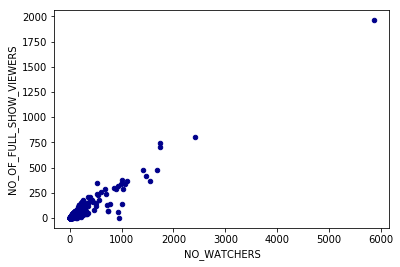

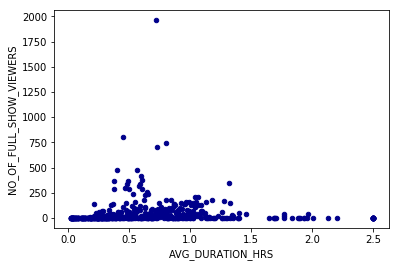

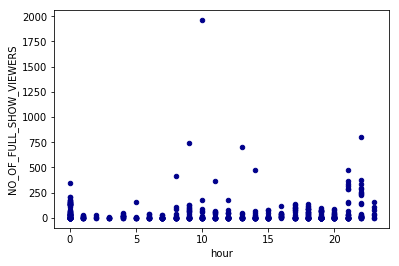

In [59]:
all_join_data.plot.scatter(y='NO_OF_FULL_SHOW_VIEWERS',x='NO_WATCHERS',c='DarkBlue')
all_join_data.plot.scatter(y='NO_OF_FULL_SHOW_VIEWERS',x='AVG_DURATION_HRS',c='DarkBlue')
all_join_data.plot.scatter(y='NO_OF_FULL_SHOW_VIEWERS',x='hour',c='DarkBlue')

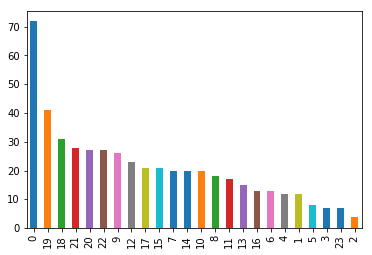

In [35]:
all_join_data.hour.value_counts().plot(kind ='bar')